In [1]:
## Commented
# import random
# train_dict = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[round(random.random(),2)  for _ in range(0,25)]} for _ in range(100)]
# for item in train_dict:
#     print(item)


In [2]:
import random


def precis_value(val,error_val=0.1):
    if val >= 1-error_val:
        val = 1
    else:
        val = 0
    return val

arr_dict = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.1)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
arr_dict_20 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.2)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
arr_dict_30 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.3)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
arr_dict_40 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.4)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
arr_dict_50 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.5)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
arr_dict_60 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.6)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
arr_dict_70 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),2),error_val=0.7)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]

# for dictionary in arr_dict:
#     print(dictionary)


len_for_priznak = 25
etalon = { ### real etalon 
    '1' : [1 for _ in range(8)] + [0 for _ in range(len_for_priznak-8)],
    '2' : [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-16)] + [0 for _ in range(8)],
    '3' : [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-8)],
}

# for e in etalon.items():
#     print(e)

# print( f"etalon is {sum(etalon['2'])}")


In [3]:

def count_match_to_etalon(arr_dict=arr_dict):
    etalon = { ### real etalon 
    '1' : [1 for _ in range(8)] + [0 for _ in range(len_for_priznak-8)],
    '2' : [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-16)] + [0 for _ in range(8)],
    '3' : [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-8)],
    }
    ## Mutation
    for item in arr_dict:
        key_for_mutation = item['like_arr']
        random_massiv = item['data_like_arr'].copy()
        state_for_mutation = etalon[str(key_for_mutation)].copy()
        num = 0
        for dirty_priznak,etalon_priznak in zip(random_massiv,state_for_mutation):
            
            if int(dirty_priznak) == 1:
                if state_for_mutation[num] == 1:
                    state_for_mutation[num] = 0
                else:
                    state_for_mutation[num] = 1
            num +=1
        item['data_like_arr'] =  state_for_mutation     

    keys_for_etlon = etalon.keys()
    for item in arr_dict:
        for key in keys_for_etlon:
            check_by_etalon = etalon[key]
            data_like_arr = item['data_like_arr']
            sum = 0
            for checked_item,proper_item in zip(data_like_arr,check_by_etalon):
                if checked_item == proper_item:
                    sum +=1
            match_to_etalon =  sum/len(data_like_arr)
            
            item['match_to_etalon'][key] = round(match_to_etalon,4) # ROUND
    return {'arr_dict':arr_dict}

# arr_dict = count_match_to_etalon(arr_dict=arr_dict)['arr_dict']
# arr_dict_20 = count_match_to_etalon(arr_dict=arr_dict_20)['arr_dict']
# arr_dict_30 = count_match_to_etalon(arr_dict=arr_dict_30)['arr_dict']
# arr_dict_40 = count_match_to_etalon(arr_dict=arr_dict_40)['arr_dict']
# arr_dict_50 = count_match_to_etalon(arr_dict=arr_dict_50)['arr_dict']
# arr_dict_60 = count_match_to_etalon(arr_dict=arr_dict_60)['arr_dict']
# arr_dict_70 = count_match_to_etalon(arr_dict=arr_dict_70)['arr_dict']








# for i in arr_dict_20:
#     print(i)



In [4]:
static_10, static_20, static_30, static_40, static_50,  static_60, static_70, = [{
    'green':0,
    'yellow':0,
    'red':0
} for _ in range(7)]
                 
def count_static(arr_dict=arr_dict,static=static_10):
    for item in arr_dict:
        
        vals_to_match = list(item['match_to_etalon'].values())
        item_to_match = item['match_to_etalon'][str(item['like_arr'])]

        if item_to_match == max(vals_to_match) :
            static['green'] = static['green'] + 1
            item['result'] = 'green'
            

        elif item_to_match != max(vals_to_match) and item_to_match != min(vals_to_match):
            static['yellow'] = static['yellow'] + 1 
            item['result'] = 'yellow'

        elif item_to_match == min(vals_to_match):
            static['red'] = static['red'] + 1
            item['result'] = 'red'
    static_keys = list(static.keys())
    sum_of_static = sum(list(static.values())) 
    for key in  static_keys:
        static[key] = static[key]/sum_of_static
    return {'arr_dict':arr_dict,'static_10':static}



# arr_dict = count_static(arr_dict=arr_dict,static=static_10)['arr_dict']
# arr_dict_20 = count_static(arr_dict=arr_dict_20,static=static_20)['arr_dict']
# arr_dict_30 = count_static(arr_dict=arr_dict_30,static=static_30)['arr_dict']                
# arr_dict_40 = count_static(arr_dict=arr_dict_40,static=static_40)['arr_dict'] 
# arr_dict_50 = count_static(arr_dict=arr_dict_50,static=static_50)['arr_dict']
# arr_dict_60 = count_static(arr_dict=arr_dict_60,static=static_60)['arr_dict']                
# arr_dict_70 = count_static(arr_dict=arr_dict_70,static=static_70)['arr_dict']                





# print(static_10)
# print(static_20)
# print(static_30)
# print(static_40)
# print(static_50)
# print(static_60)
# print(static_70)




            

In [5]:
def get_keys_values(static):
    keys = static.keys()
    values = static.values()
    return {'keys':list(keys),'values':list(values)}

# print(get_keys_values(static=static_10)['values'])
# print(get_keys_values(static=static_20)['values'])
# print(get_keys_values(static=static_30)['values'])
# print(get_keys_values(static=static_40)['values'])
# print(get_keys_values(static=static_50)['values'])







In [6]:
import pandas as pd

def create_df(static):
    df = pd.DataFrame({'team': get_keys_values(static=static)['keys'],
    'points': get_keys_values(static=static)['values']})
    return df
def solve_pz_number_1() -> bool | list:
    

    arr_dict = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.1)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_20 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.2)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_30 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.3)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_40 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.4)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_50 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.5)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_60 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.6)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_70 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.7)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_80 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.8)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]
    arr_dict_90 = [ {'like_arr':random.choice([1,2,3]),'data_like_arr':[precis_value(round(random.random(),3),error_val=0.9)  for _ in range(0,25)],'match_to_etalon':{}} for _ in range(100)]

    arr_dict = count_match_to_etalon(arr_dict=arr_dict)['arr_dict']
    arr_dict_20 = count_match_to_etalon(arr_dict=arr_dict_20)['arr_dict']
    arr_dict_30 = count_match_to_etalon(arr_dict=arr_dict_30)['arr_dict']
    arr_dict_40 = count_match_to_etalon(arr_dict=arr_dict_40)['arr_dict']
    arr_dict_50 = count_match_to_etalon(arr_dict=arr_dict_50)['arr_dict']
    arr_dict_60 = count_match_to_etalon(arr_dict=arr_dict_60)['arr_dict']
    arr_dict_70 = count_match_to_etalon(arr_dict=arr_dict_70)['arr_dict']
    arr_dict_80 = count_match_to_etalon(arr_dict=arr_dict_80)['arr_dict']
    arr_dict_90 = count_match_to_etalon(arr_dict=arr_dict_90)['arr_dict']

    static_10, static_20, static_30, static_40, static_50,  static_60, static_70,static_80,static_90, = [{
        'green':0,
        'yellow':0,
        'red':0
    } for _ in range(9)]

    arr_dict = count_static(arr_dict=arr_dict,static=static_10)['arr_dict']
    arr_dict_20 = count_static(arr_dict=arr_dict_20,static=static_20)['arr_dict']
    arr_dict_30 = count_static(arr_dict=arr_dict_30,static=static_30)['arr_dict']                
    arr_dict_40 = count_static(arr_dict=arr_dict_40,static=static_40)['arr_dict'] 
    arr_dict_50 = count_static(arr_dict=arr_dict_50,static=static_50)['arr_dict']
    arr_dict_60 = count_static(arr_dict=arr_dict_60,static=static_60)['arr_dict']                
    arr_dict_70 = count_static(arr_dict=arr_dict_70,static=static_70)['arr_dict']
    arr_dict_80 = count_static(arr_dict=arr_dict_80,static=static_80)['arr_dict']
    arr_dict_90 = count_static(arr_dict=arr_dict_90,static=static_90)['arr_dict']
    list_of_dicts = [static_10,static_20,static_30,static_40,static_50,static_60,static_70,static_80,static_90]
    for item in list_of_dicts:
        item = item
    df_10 = create_df(static=static_10)
    df_20 = create_df(static=static_20)
    df_30 = create_df(static=static_30)
    df_40 = create_df(static=static_40)
    df_50 = create_df(static=static_50)
    df_60 = create_df(static=static_60)
    df_70 = create_df(static=static_70)
    df_80 = create_df(static=static_80)
    df_90 = create_df(static=static_90)
    list_of_dfs = [df_10,df_20,df_30,df_40,df_50,df_60,df_70,df_80,df_90]

    return  {'dicts' : list_of_dicts ,'dfs' : list_of_dfs} 



# may_be_list = False
# while not may_be_list:
#     may_be_list  = solve_pz_number_1()


may_be_list = solve_pz_number_1()['dfs']
# for num,item in enumerate(may_be_list):
#     if num == 0:
#         plot = item.plot.pie(y='points', figsize=(5, 5), colors = ['green', 'yellow', 'red'],autopct='%1.0f%%',title='10%')
#     else:
#         plot = item.plot.pie(subplots=True,y='points', figsize=(5, 5), colors = ['green', 'yellow', 'red'],autopct='%1.0f%%',title=f'{num+1}0%')


In [7]:
may_be_list = solve_pz_number_1()
print(may_be_list['dfs'][0])
dicts = solve_pz_number_1()['dicts']
print(dicts[0])

     team  points
0   green     1.0
1  yellow     0.0
2     red     0.0
{'green': 1.0, 'yellow': 0.0, 'red': 0.0}


[1.0, 0.98, 0.96, 0.81, 0.4, 0.15, 0.02, 0.0, 0.0]


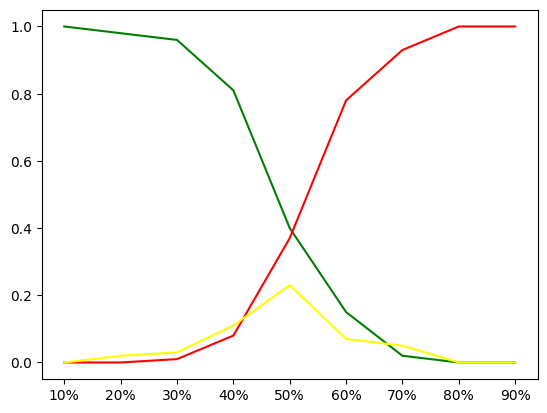

In [8]:

# PZ 1 show

from matplotlib import pyplot as plt   
#ploting our canvas  
green_values = [item['green'] for item in dicts] # our pz 1
red_values = [item['red'] for item in dicts] # data for 3 pz
yellow_values = [item['yellow'] for item in dicts] # data for 3 pz
percents_of_mutation = [ str(item)+'%' for item in range(10,100,10)]
print(green_values)
plt.plot(percents_of_mutation,green_values,color='green')   
plt.plot(percents_of_mutation,red_values,color='red')   
plt.plot(percents_of_mutation,yellow_values,color='yellow')   
#display the graph   
plt.show() 


In [9]:

# PZ 3 functions and libs

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.svm import SVC



def get_mutate_arrs(mutation_rate:float,etalon_event:list,num_mutations:int) -> list:
    """
    ### Процент мутации (10%)
    mutation_rate = 0.1

    ### Количество мутаций
    num_mutations

    ### эталон для дальнейшей мутации
    etalon_events
    """
    mutated_events = []
    for item in range(num_mutations):
        # Создание 100 мутаций
        mutation = list(*np.random.choice([0, 1], size=(1, len(etalon_event)), p=[1 - mutation_rate, mutation_rate]))
        # Применение мутаций
        mutated_event = [x ^ y for x, y in zip(etalon_event, mutation)]
        mutated_events.append(mutated_event)
    ## Много экземпляров мутаций
    return mutated_events

def count_accuracy_by_mutation_rate_kn_model(mutation_rate,etalon_events):

    # Получение мутаций для каждого эталона
    # our_mutations = [get_mutate_arrs(mutation_rate=0.1, etalon_event=etalon, num_mutations=10) for etalon in etalon_events]
    our_mutations = [get_mutate_arrs(0.1, etalon_event=etalon, num_mutations=10000) for etalon in etalon_events]

    # Подготовка данных
    X = []
    y = []

    # Создание обучающего набора и меток
    ## ПРАВИЛЬНО
    for i, etalon in enumerate(etalon_events):
        X += our_mutations[i]
        y += [i] * len(our_mutations[i])
    ## ПРОВЕРЯЕМ
    # print(X,y,sep='\n')
    
  
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(X_train, X_test, y_train, y_test,sep='\n')

    # # # # # Создание и обучение модели KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=10)
    knn_classifier.fit(X_train, y_train)

    # # # # Новый набор данных на основе эталона для предсказания
    new_mutations = [get_mutate_arrs(mutation_rate, etalon_event=etalon, num_mutations=100) for etalon in etalon_events]
    fixed_parameter = 0
    # print(new_mutations[fixed_parameter])
    y_pred = knn_classifier.predict(new_mutations[fixed_parameter])
    # print(y_pred)

    # # # Оценка точности
    accuracy = 0
    for i in y_pred:
        if i == fixed_parameter:
            accuracy += 1
    accuracy /= len(new_mutations[fixed_parameter])
    return accuracy


def count_accuracy_by_mutation_rate_SVC_model(mutation_rate,etalon_events):

    # Получение мутаций для каждого эталона
    # our_mutations = [get_mutate_arrs(mutation_rate=0.1, etalon_event=etalon, num_mutations=10) for etalon in etalon_events]
    our_mutations = [get_mutate_arrs(0.1, etalon_event=etalon, num_mutations=10000) for etalon in etalon_events]

    # Подготовка данных
    X = []
    y = []

    # Создание обучающего набора и меток
    ## ПРАВИЛЬНО
    for i, etalon in enumerate(etalon_events):
        X += our_mutations[i]
        y += [i] * len(our_mutations[i])
    ## ПРОВЕРЯЕМ
    # print(X,y,sep='\n')
    
  
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(X_train, X_test, y_train, y_test,sep='\n')

    # # # # # Создание и обучение модели KNN
    knn_classifier = SVC()

    knn_classifier.fit(X_train, y_train)

    # # # # Новый набор данных на основе эталона для предсказания
    new_mutations = [get_mutate_arrs(mutation_rate, etalon_event=etalon, num_mutations=100) for etalon in etalon_events]
    fixed_parameter = 0
    # print(new_mutations[fixed_parameter])
    y_pred = knn_classifier.predict(new_mutations[fixed_parameter])
    # print(y_pred)

    # # # Оценка точности
    accuracy = 0
    for i in y_pred:
        if i == fixed_parameter:
            accuracy += 1
    accuracy /= len(new_mutations[fixed_parameter])
    return accuracy


def count_accuracy_by_mutation_rate_tree(mutation_rate,etalon_events):

    # Получение мутаций для каждого эталона
    # our_mutations = [get_mutate_arrs(mutation_rate=0.1, etalon_event=etalon, num_mutations=10) for etalon in etalon_events]
    our_mutations = [get_mutate_arrs(0.1, etalon_event=etalon, num_mutations=10000) for etalon in etalon_events]

    # Подготовка данных
    X = []
    y = []

    # Создание обучающего набора и меток
    ## ПРАВИЛЬНО
    for i, etalon in enumerate(etalon_events):
        X += our_mutations[i]
        y += [i] * len(our_mutations[i])
    ## ПРОВЕРЯЕМ
    # print(X,y,sep='\n')
    
  
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # print(X_train, X_test, y_train, y_test,sep='\n')

    # # # # # Создание и обучение модели KNN
    knn_classifier = DecisionTreeClassifier()
    knn_classifier.fit(X_train, y_train)

    # # # # Новый набор данных на основе эталона для предсказания
    new_mutations = [get_mutate_arrs(mutation_rate, etalon_event=etalon, num_mutations=100) for etalon in etalon_events]
    fixed_parameter = 0
    # print(new_mutations[fixed_parameter])
    y_pred = knn_classifier.predict(new_mutations[fixed_parameter])
    # print(y_pred)

    # # # Оценка точности
    accuracy = 0
    for i in y_pred:
        if i == fixed_parameter:
            accuracy += 1
    accuracy /= len(new_mutations[fixed_parameter])
    return accuracy




['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
[1.0, 0.98, 0.96, 0.81, 0.4, 0.15, 0.02, 0.0, 0.0]
[1.0, 1.0, 0.93, 0.76, 0.5, 0.17, 0.02, 0.0, 0.0]
[0.99, 0.91, 0.76, 0.56, 0.36, 0.16, 0.1, 0.01, 0.0]


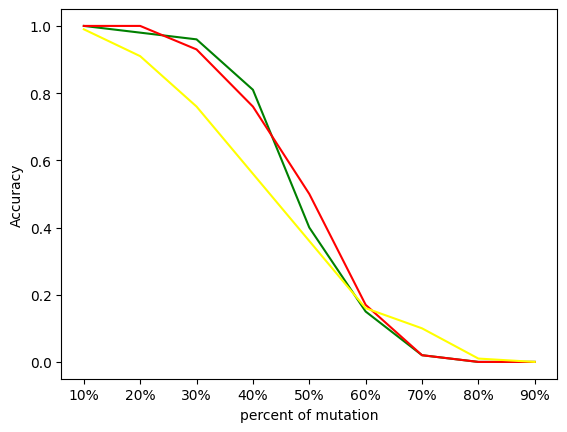

In [12]:
# PZ 3 show


from matplotlib import pyplot as plt   
 
green_values = [item['green'] for item in dicts] # our pz 1


len_for_priznak = 25
etalon_events = [ 
    [1 for _ in range(8)] + [0 for _ in range(len_for_priznak-8)],
    [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-16)] + [0 for _ in range(8)],
    [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-8)]]

red_values = []# data for 4 pz
for i in range(1,10):
    accuracy_knn = count_accuracy_by_mutation_rate_kn_model(mutation_rate=i/10,etalon_events=etalon_events)
    red_values.append(accuracy_knn)

yellow_values = []
for i in range(1,10):
    accuracy_tree = count_accuracy_by_mutation_rate_tree(mutation_rate=i/10,etalon_events=etalon_events)
    yellow_values.append(accuracy_tree)
percents_of_mutation = [ str(item)+'%' for item in range(10,100,10)]

print(percents_of_mutation)
print(f"{green_values}")
print(f"{red_values}")
print(f"{yellow_values}")

plt.plot(percents_of_mutation,green_values,color='green',label='match')   
plt.plot(percents_of_mutation,red_values,color='red',label='knn')   
plt.plot(percents_of_mutation,yellow_values,color='yellow',label='tree')   
plt.xlabel('percent of mutation')
plt.ylabel('Accuracy')   
#display the graphik  
plt.show() 




